<a href="https://colab.research.google.com/github/narayanan-nithya/FGM_Predictive-Analysis/blob/master/FGM_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#Load empirical package for survival analysis
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [78]:
#import the pmf, cdf, surv and hazard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf, Surv, Hazard

In [79]:
#function to take care of the axes definitions.
def decorate(**options):
    """Decorate the current axes.
    """
    plt.gca().set(**options)
    plt.tight_layout()

In [80]:
# Load the data file

from google.colab import files
uploaded = files.upload()



Saving Opinion_Rating.csv to Opinion_Rating (1).csv


In [81]:
#read the dataframe
df = pd.read_csv('Opinion_Rating.csv')
df

,Sex,Year,Value
0,Female,2010,86
1,Female,2012,83
2,Female,2013,66
3,Female,2014,76
4,Female,2015,81
5,Female,2016,84
6,Female,2017,84
7,Female,2018,88


In [82]:
df.drop(df.filter(regex="Unnamed:"),axis=1, inplace=True)

In [83]:
df.head()

,Sex,Year,Value
0,Female,2010,86
1,Female,2012,83
2,Female,2013,66
3,Female,2014,76
4,Female,2015,81


In [84]:
#calling the probability mass function to determine the probability beyond x number of years. 
pmf = Pmf(df['Value'].values, index=df['Year'])
pmf.normalize()
pmf

,probs
Year,
2010,0.132716
2012,0.128086
2013,0.101852
2014,0.117284
2015,0.125000
2016,0.129630
2017,0.129630
2018,0.135802


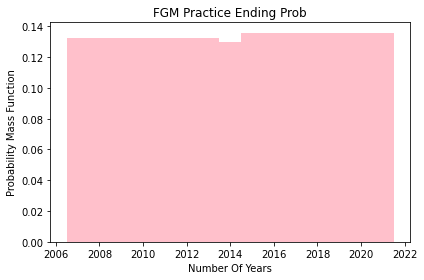

In [85]:
#visualizing pmf
pmf.bar(width=7, color='pink')
decorate(xlabel='Number Of Years', 
         ylabel='Probability Mass Function', 
         title='FGM Practice Ending Prob')

# New Section

In [86]:
#calling the survival function to create the survival curve. surv function is the cumulative sum of the cdf. 
surv = cdf.make_surv()
surv

,probs
Year,
2010,0.867284
2012,0.739198
2013,0.637346
2014,0.520062
2015,0.395062
2016,0.265432
2017,0.135802
2018,0.000000


In [87]:
surv(2018)

array(0.)

In [88]:
cdf(2018) + surv(2018)

1.0

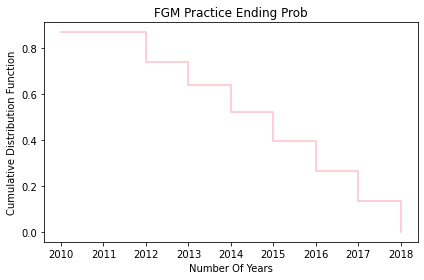

In [89]:
surv.step(color='pink')
decorate(xlabel='Number Of Years', 
         ylabel='Cumulative Distribution Function', 
         title='FGM Practice Ending Prob')


# **Summary**
